# Trabalho de conclusão de curso - Data Science com ênfase em Machine Learning
## Alunos: Douglas Tadeu Sabatini & Jari Fernandes Nogueira Neto


### FIB Bauru - 06/2020

### Etapa de treinamento da rede neural dedicada aos caracteres numéricos.

In [2]:
# Carregando bibliotecas.
import imutils

import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from tensorflow.keras import datasets, layers, models

import keras
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout


import cv2
import matplotlib.pyplot as plt
import os

import pandas as pd
import numpy as np
import glob

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [0]:
# Criando lista de treino.

x_treino = []
y_treino = []

# Criando dataframe para análise posterior.

treino = pd.DataFrame ()
treino["IMAGEM"] = ()
treino["ROTULO"] = ()

In [0]:
# Populando a lista x com as imagens e atribuindo o nome de sua respectiva pasta na lista y, que será o rótulo.
# Inserindo também as informações na base final.

imagens = glob.glob ("/content/numeros/treino/num_sk/*/*.png")
for img in imagens:
    imagem = cv2.imread (img, 0)
    x_treino.append(imagem) # Agregando a imagem na lista x.
    y_treino.append(int(img[33:34])) # Salvando rótulo na lista y.
    treino.loc[img, 'IMAGEM'] = img[33:] # Incluindo o nome da imagem no df.
    treino.loc[img, 'ROTULO'] = img[33:34] # Incluindo o label da imagem no df (pelo nome da pasta).

x_treino:  (100, 240, 170)
ROTULO:  9


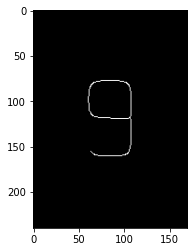

In [5]:
# Verificando se as imagens foram carregadas e exibindo exemplo.

ref = 1

print('x_treino: ', np.array(x_treino).shape) 
plt.imshow(x_treino[ref], cmap = 'gray')
print('ROTULO: ', y_treino[ref])

In [6]:
# Verificando a montagem do dataframe, removendo o index (está com o caminho da pasta) e exibindo um exemplo.

treino = treino.reset_index(drop=True)
treino.head()

,IMAGEM,ROTULO
0,6B_1_1-skull.png,6
1,6B_2_1-skull.png,6
2,6B_0_1-skull.png,6
3,6_4_1-skull.png,6
4,6_3_1-skull.png,6


In [7]:
# Definindo o total de categorias.
categorias = 10

# Adequando labels para input da rede.
y_treino = keras.utils.to_categorical(y_treino, categorias)
x_treino = np.expand_dims(x_treino, -1)
y_treino = np.asarray(y_treino)
y_treino.shape

(100, 10)

In [0]:
# Criando lista de teste.

x_teste = []
y_teste = []

# Criando dataframe para análise posterior.

teste = pd.DataFrame ()
teste["IMAGEM"] = ()
teste["ROTULO"] = ()

In [0]:
# Populando a lista x com as imagens e atribuindo o nome de sua respectiva pasta na lista y, que será o rótulo.
# Inserindo também as informações na base final.

imagens_teste = glob.glob ("/content/numeros/teste/num_sk*/*.png")

for imgtest in imagens_teste:
    imagem = cv2.imread (imgtest, 0)
    x_teste.append(imagem) # Agregando a imagem na lista x.
    y_teste.append(int(imgtest[30:31])) # Salvando rótulo na lista y.
    teste.loc[imgtest, 'IMAGEM'] = imgtest[30:] # Incluindo o nome da imagem no df.
    teste.loc[imgtest, 'ROTULO'] = imgtest[30:31] # Incluindo o label da imagem no df (pelo nome da pasta).

x_teste:  (124, 240, 170)
ROTULO:  3


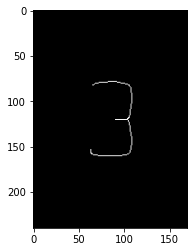

In [10]:
ref = 1

print('x_teste: ', np.array(x_teste).shape) 
plt.imshow(x_teste[ref], cmap = 'gray')
print('ROTULO: ', y_teste[ref])

In [16]:
# Verificando o dataframe, removendo o index (está com o caminho da pasta) e exibindo um exemplo.

teste = teste.reset_index(drop=True)
teste.head()

,IMAGEM,ROTULO
0,8_DCW0886_5_8_skull_.png,8
1,3_FXB3837_4_3_skull_.png,3
2,9_DNA3249_7_9_skull_.png,9
3,6_FZQ6245_4_6_skull_.png,6
4,1_FDJ5185_5_1_skull_.png,1


In [11]:
# Repetindo processo das categorias, na base teste.

y_teste = keras.utils.to_categorical(y_teste, categorias)
x_teste = np.expand_dims(x_teste, -1)
y_teste = np.asarray(y_teste)

y_teste.shape

(124, 10)

# Treinamento da Rede.

In [12]:
## Criando o modelo.
model = keras.Sequential()

# Camada de convolução com ativação relu. 
# 32 filtros com tamanho 30x30
model.add(Conv2D(32, kernel_size=(30, 30),
                 activation = 'relu',
                 input_shape = (240, 170, 1)))


# 32 filtros com tamanho 30x30
model.add(Conv2D(64, (30, 30), activation='relu'))

# Camada de max-pooling, para reduzir o tamanho e capturar melhores features, com tamanho 50x50.
model.add(MaxPooling2D(pool_size=(30, 30)))

# Dropout de 25%, para ajudar no over-fitting.
model.add(Dropout(0.25))

# Camada de flatten, para reduzir as dimensões gerada pelo pooling.
model.add(Flatten())


# Camada fully connected.
model.add(Dense(128, activation='relu'))

# Dropout de 50% por segurança.
model.add(Dropout(0.5))

# Camada softmax para categorizar o resultado.
model.add(Dense(10, activation='softmax')) # 10 categorias.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Compilando o modelo.
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [14]:
# Exibindo o resumo de nossa CNN.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 211, 141, 32)      28832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 182, 112, 64)      1843264   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 3, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               147584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [15]:
# Definindo o número de épocas.
## OBS: Utilizaremos 100% das amostras de treinamento, para validação: Batch Gradient Descent.

num_epoch = 100

# Treinamento do modelo.
model_log = model.fit(x_treino, y_treino,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_teste, y_teste))

Train on 100 samples, validate on 124 samples
Epoch 1/100
100/100 [==============================] - 14s 143ms/step - loss: 40.6074 - accuracy: 0.0700 - val_loss: 4.0921 - val_accuracy: 0.2581
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 4.6876 - accuracy: 0.2200 - val_loss: 1.8991 - val_accuracy: 0.2661
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 1.8330 - accuracy: 0.3900 - val_loss: 1.6221 - val_accuracy: 0.4355
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 1.5509 - accuracy: 0.4900 - val_loss: 1.7157 - val_accuracy: 0.4435
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 1.2750 - accuracy: 0.6400 - val_loss: 1.1223 - val_accuracy: 0.6371
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.9683 - accuracy: 0.6600 - val_loss: 0.9125 - val_accuracy: 0.7823
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.7560 - accuracy

## Aplicando modelo na base de testes.

In [0]:
# Aplicando Score na base de testes e exibindo a acurácia e loss.
score = model.evaluate(x_teste, y_teste, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 1.3302853185379604e-05
Test accuracy: 1.0


In [17]:
# Adicionando resultado e criando coluna para filtro de erros.
y_prob = model.predict(x_teste) 
y_classes = y_prob.argmax(axis=-1)

teste['PREDICT'] = y_classes

teste = teste.astype({'ROTULO': 'int64'}) # Ajustando tipo do dado, para comparação.
teste['ERROR'] = np.where((teste['ROTULO'] == teste['PREDICT']) , 0, 1)
teste = teste.sort_values('IMAGEM')

teste

,IMAGEM,ROTULO,PREDICT,ERROR
39,0_DCW0886_4_0_skull_.png,0,0,0
114,0_DMQ0681_4_0_skull_.png,0,0,0
120,0_EBV7055_5_0_skull_.png,0,0,0
18,0_FHL0898_4_0_skull_.png,0,0,0
65,0_FKR3470_7_0_skull_.png,0,0,0
...,...,...,...,...
101,9_FSW2949_5_9_skull_.png,9,9,0
63,9_FSW2949_7_9_skull_.png,9,9,0
15,9_FTU5739_7_9_skull_.png,9,9,0
44,9_FXZ3369_7_9_skull_.png,9,9,0


# Gravando e carregando o modelo treinado.

In [0]:
# Salvando o modelo treinado.

# Criando Json com o modelo.
model_json = model.to_json()
with open("/content/model_num_100-1.json", "w") as json_file:
    json_file.write(model_json)
    
# Gravando pesos do modelo em HDF5 - Hierarchical Data Format.
model.save_weights("/content/model_num_100-1.h5")
print("Modelo gravado na pasta de códigos.")

Modelo gravado na pasta de códigos.


## Plotando resultados.

Text(0.5, 0, 'epoch')

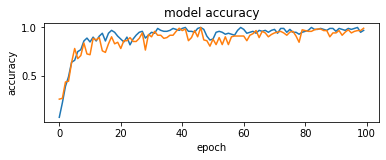

In [19]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')



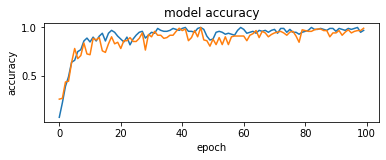

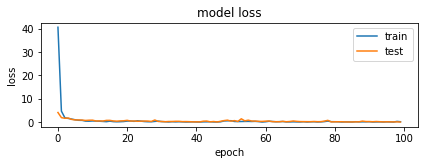

In [20]:
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig